##**Analysis of MBTA 2023 Rapid Transit Speed Restrictions by Subway Line**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **Section 1: Combine datasets.**

**1. Create dataframes for each csv file.**

In [ ]:
#Create a dataframe for each month's data.

mbta_dat_1_23 = pd.read_csv("2023-01_Speed_Restrictions_By_Day.csv")
mbta_dat_2_23 = pd.read_csv("2023-02_Speed_Restrictions_By_Day.csv")
mbta_dat_3_23 = pd.read_csv("2023-03_Speed_Restrictions_By_Day.csv")
mbta_dat_4_23 = pd.read_csv("2023-04_Speed_Restrictions_By_Day.csv")
mbta_dat_5_23 = pd.read_csv("2023-05_Speed_Restrictions_By_Day.csv")
mbta_dat_6_23 = pd.read_csv("2023-06_Speed_Restrictions_By_Day.csv")
mbta_dat_7_23 = pd.read_csv("2023-07_Speed_Restrictions_By_Day.csv")
mbta_dat_8_23 = pd.read_csv("2023-08_Speed_Restrictions_By_Day.csv")
mbta_dat_9_23 = pd.read_csv("2023-09_Speed_Restrictions_By_Day.csv")
mbta_dat_10_23 = pd.read_csv("2023-10_Speed_Restrictions_By_Day.csv")
mbta_dat_11_23 = pd.read_csv("2023-11_Speed_Restrictions_By_Day.csv")
mbta_dat_12_23 = pd.read_csv("2023-12_Speed_Restrictions_By_Day.csv")
mbta_dat_1_24 = pd.read_csv("2024-01_Speed_Restrictions_By_Day.csv")

**2.Clean data as needed.**

In [ ]:
mbta_dat_1_23.columns

In [ ]:
num_columns=len(mbta_dat_6_23.columns)
num_columns

In [ ]:
#Check column names for consistency.
mbta_dat_1_23.columns
#Drop unneeded combination identifier found only in mbta_dat_6_23.
mbta_dat_6_23_cleaned = mbta_dat_6_23.drop(columns='SRV_MAIN_UNIQUE_ID')

**3. Add variable to differentiate.**

In [ ]:
#Add variable 'Month_Year' to each dataframe.
mbta_dat_1_23['Month_Year'] = '1.23'
mbta_dat_2_23['Month_Year'] = '2.23'
mbta_dat_3_23['Month_Year'] = '3.23'
mbta_dat_4_23['Month_Year'] = '4.23'
mbta_dat_5_23['Month_Year'] = '5.23'
mbta_dat_6_23_cleaned['Month_Year'] = '6.23'
mbta_dat_7_23['Month_Year'] = '7.23'
mbta_dat_8_23['Month_Year'] = '8.23'
mbta_dat_9_23['Month_Year'] = '9.23'
mbta_dat_10_23['Month_Year'] = '10.23'
mbta_dat_11_23['Month_Year'] = '11.23'
mbta_dat_12_23['Month_Year'] = '12.23'
mbta_dat_1_24['Month_Year'] = '1.24'

**4. Concatenate.**


In [ ]:
#Create complete dataframe.
mbta_complete_dat=pd.concat([mbta_dat_1_23,
                            mbta_dat_2_23,
                            mbta_dat_3_23,
                            mbta_dat_4_23,
                            mbta_dat_5_23,
                            mbta_dat_6_23_cleaned,
                            mbta_dat_7_23,
                            mbta_dat_8_23,
                            mbta_dat_9_23,
                            mbta_dat_10_23,
                            mbta_dat_11_23,
                            mbta_dat_12_23,
                            mbta_dat_1_24],axis=0)
mbta_complete_dat.count()

**5. Investigate Suspicious Data.**

In [ ]:
#Investigate a suspicion due to unreasonably small percent values. See below:

mbta_complete_dat['Systemwide_Restricted_Track_Pct'].head()

In [ ]:
#Calculate independently:
systemwide_restricted_track_pct = (mbta_complete_dat['Restriction_Distance_Miles']/mbta_complete_dat[
                                                'Systemwide_Total_Track_Miles'])*100
systemwide_restricted_track_pct.head()

#Assertion:['Systemwide_Restricted_Track_Pct'] column was calculated as a ratio.
#It was mislabeled as a percent (value out of 100).

In [ ]:
#Fix so the values are now percents correctly calculated/labeled:
mbta_complete_dat['Systemwide_Restricted_Track_Pct']=((mbta_complete_dat['Systemwide_Restricted_Track_Pct'])*100)
mbta_complete_dat['Systemwide_Restricted_Track_Pct'].head()

In [ ]:
#Investigate additional suspicious data:
mbta_complete_dat['Line_Restricted_Track_Pct'].head()

In [ ]:
#Calculate independently:
line_restricted_track_pct = (mbta_complete_dat['Restriction_Distance_Miles']/mbta_complete_dat[
                                                'Line_Total_Track_Miles'])*100
line_restricted_track_pct.head()

#Assertion:['Line_Restricted_Track_Pct'] column was also calculated as a ratio.
#It was also mislabeled as a percent (value out of 100).

In [ ]:
#Fix so the values are now percents correctly calculated/labeled:
mbta_complete_dat['Line_Restricted_Track_Pct']=((mbta_complete_dat['Line_Restricted_Track_Pct'])*100)
mbta_complete_dat['Line_Restricted_Track_Pct'].head()

### **Section 2. Limit to Unique Restrictions.**

In [ ]:
#Identify unique active restrictions rolled over from 2022.
rollover_dat = mbta_complete_dat[
               (mbta_complete_dat['Month_Year'] == '1_23') &
               (mbta_complete_dat["Month_Restriction_Count_Start"] == 1)]

In [ ]:
#Identify unique new restrictions during all months.
new_dat = mbta_complete_dat[mbta_complete_dat["Restriction_Count_New"]==1]


In [ ]:
#Combine all unique instances during 1/23-1/24.
unique_dat=pd.concat([rollover_dat,new_dat],axis=0)
unique_dat['ID'].count()

### **Section 3. Subset by Restriction Reason.**

In [ ]:
#Prepare to subset restriction reason(s) of interest.
unique_dat['Restriction_Reason'].value_counts()

In [ ]:
#Subset restrictions due to track disrepair.
track_dat= unique_dat[unique_dat['Restriction_Reason']=='Track']
track_dat['ID'].count()

### **Section 4. Drop and Add Variables**

**1. Drop extraneous variables.**

In [ ]:
#Remove extraneous variables.
mbta_dat = track_dat.drop(columns=[

    #Drop location details other than subway line.
    'Track_Direction',
    'Branch',
    'Track_Name',
    'Location_Description',
    'Loc_GTFS_Stop_ID',
    'Location_Type',
    'Direction_Sort',

   #Drop length measurements other than miles.
    'Restriction_Distance_Feet',
    'SR_Restriction_Distance_Span',
    'Restriction_Path',

    #Drop time measurements other than monthly.
    'Restriction_Days_Active_On_Calendar_Day',
    'Daily_Restriction_Count_Start',
    'Daily_Restriction_Count_End',
    'Date_Restriction_Reported',
    'Date_Restriction_Cleared',
    'Restriction_Status'], axis=1)

**2. Create variable 'Restriction_Time (hrs)'.**

In [ ]:
#Convert 'Restriction_Speed_MPH' type to int (prep for division).

mbta_dat['Restriction_Speed_MPH'].dtype                    #Identify type.

mbta_dat['Restriction_Speed_MPH'] = mbta_dat[
        'Restriction_Speed_MPH'].astype(str)              #Convert from object to string.

mbta_dat['Restriction_Speed_MPH'] = mbta_dat[
        'Restriction_Speed_MPH'].str.replace(' mph', '')  #Remove units (mph).

mbta_dat['Restriction_Speed_MPH'] = pd.to_numeric(
        mbta_dat['Restriction_Speed_MPH'])                 #Convert from string to numeric.

mbta_dat['Restriction_Speed_MPH'].dtype                    #Confirm values are integers.

In [ ]:
#Divide distance by speed to calculate time.

restriction_speed_MPH=mbta_dat['Restriction_Speed_MPH']
restriction_distance_miles=mbta_dat['Restriction_Distance_Miles']

mbta_dat['Restriction_Time_(hrs)']=restriction_distance_miles/restriction_speed_MPH

**3. Create variable 'Restriction_Time_(min)'.**

In [ ]:
#Convert hours to minutes by multiplying values in the original dataframe to avoid errors.

mbta_dat['Restriction_Time_(min)']= mbta_dat.loc[:, 'Restriction_Time_(hrs)']*60

In [ ]:
#Check new variable output.

#Missing?
(mbta_dat['Restriction_Time_(hrs)'].isna()).sum() #None.

#Infinite?
np.isinf(mbta_dat['Restriction_Time_(hrs)']).sum() #Two.
#Infinite indices:
inf = mbta_dat[np.isinf(mbta_dat['Restriction_Time_(hrs)'])].index
mbta_dat.loc[inf]

#Identify problem:
#1) Dividing by zero is undefined.
#2) A restriction max speed of 0 mph is an error and/or an extreme outlier.

#Resolve problem:
mbta_dat = mbta_dat[mbta_dat['Restriction_Time_(hrs)'] != np.inf]
#Check resolution:
np.isinf(mbta_dat['Restriction_Time_(hrs)']).sum()

In [ ]:
#Check new variable output.

#Missing?
(mbta_dat['Restriction_Time_(min)'].isna()).sum()  #None.
#Infinite?
np.isinf(mbta_dat['Restriction_Time_(min)']).sum() #None.

### **Section 5. Summary Statistics**

In [ ]:
#Pivot Table: Average time in minutes lost at the restriction speed
line_speed_min_pivoted=pd.pivot_table(mbta_dat,index='Restriction_Speed_MPH',columns='Line',
               values=('Restriction_Time_(min)'),aggfunc='mean')
line_speed_min_filled = line_speed_min_pivoted.fillna('')
line_speed_min_filled

Line,Blue Line,Green Line,Orange Line,Red Line
Restriction_Speed_MPH,,,,
3,,1.279973,,
5,,0.6625,,
6,,0.521006,,0.473485
10,0.642829,0.573574,0.656439,0.567038
15,,,,0.227273
20,,0.505909,,0.277538
25,0.468136,0.085606,0.262051,0.252543


In [ ]:
#Pivot Table: Total time in hours lost at the restriction speed
line_speed_hrs_pivoted=pd.pivot_table(mbta_dat,index='Restriction_Speed_MPH',columns='Line',
               values=('Restriction_Time_(hrs)'),aggfunc='sum')
line_speed_hrs_filled = line_speed_hrs_pivoted.fillna('')
line_speed_hrs_filled

Line,Blue Line,Green Line,Orange Line,Red Line
Restriction_Speed_MPH,,,,
3,,0.661319,,
5,,0.06625,,
6,,0.191035,,0.015783
10,0.310701,0.277227,0.590795,1.134076
15,,,,0.007576
20,,0.236091,,0.013877
25,0.117034,0.00428,0.170333,0.290424


In [ ]:
#Pivot Table: Total restriction distance in miles for each line each month
miles_pivoted = pd.pivot_table(mbta_dat, index='Month_Year', columns='Line',
               values=('Restriction_Distance_Miles'), aggfunc='sum')
miles_filled = miles_pivoted.fillna('')
miles_filled

Line,Blue Line,Green Line,Orange Line,Red Line
Month_Year,,,,
1.23,0.094697,0.224053,0.32197,1.886364
1.24,0.113636,,0.132576,0.624811
10.23,,0.01875,0.586553,0.170455
11.23,,0.046212,0.170455,0.189394
12.23,0.075758,0.167614,0.075758,
2.23,0.671496,0.302652,1.018939,2.810227
3.23,2.488258,5.686174,3.52178,7.763352
4.23,1.567614,0.074621,0.438826,0.965871
5.23,0.378598,,1.155303,1.032633


In [ ]:
#Pivot Table: Total percent of subway line track restricted for each line each month
pct_line_pivoted = pd.pivot_table(mbta_dat, index='Month_Year', columns='Line',
               values=('Line_Restricted_Track_Pct'), aggfunc='sum')
pct_line_filled = pct_line_pivoted.fillna('')
pct_line_filled

Line,Blue Line,Green Line,Orange Line,Red Line
Month_Year,,,,
1.23,0.75879,0.41499,1.428437,3.978831
1.24,0.910548,,0.58818,1.317888
10.23,,0.034729,2.602276,0.359533
11.23,,0.085594,0.756231,0.399481
12.23,0.607032,0.310453,0.336103,
2.23,5.380579,0.56057,4.520583,5.927499
3.23,19.937961,10.531903,15.62458,16.374926
4.23,12.561007,0.138213,1.946876,2.037273
5.23,3.033642,,5.125465,2.178024


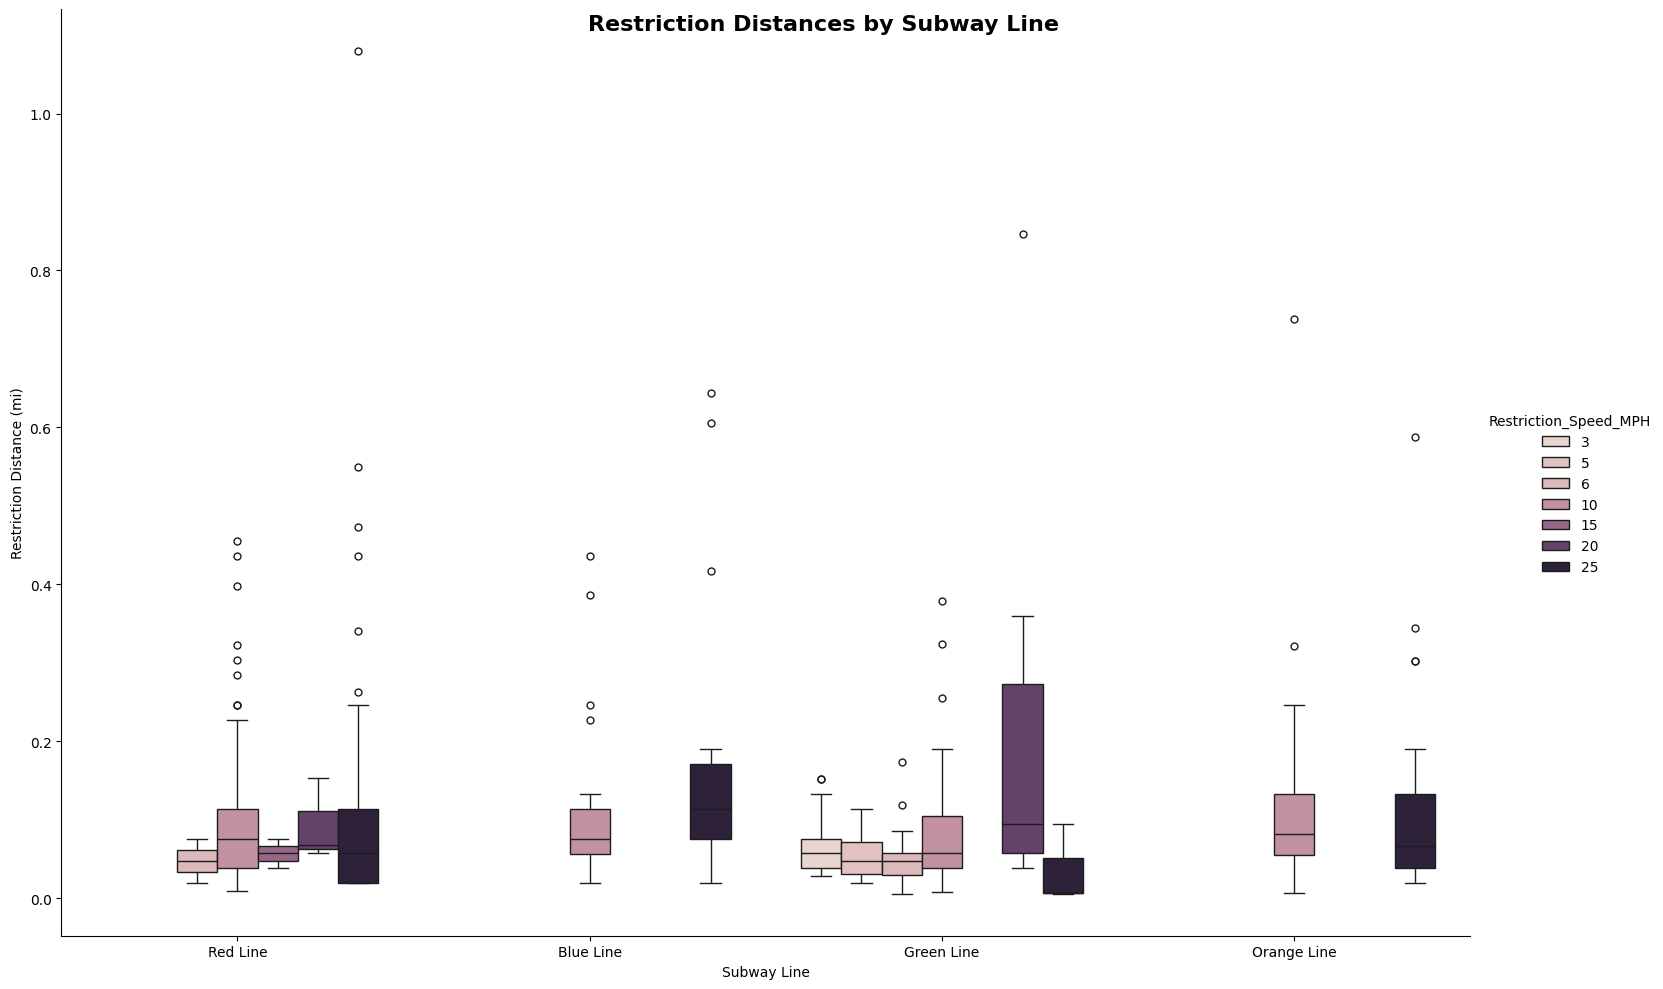

In [ ]:
#Restriction Distances in Miles:

grid=sns.catplot(
    x='Line',
    y="Restriction_Distance_Miles",
    data=mbta_dat,
kind="box",
    hue='Restriction_Speed_MPH',
    legend='full',
height=10,
aspect=1.5)

grid.set_axis_labels("Subway Line","Restriction Distance (mi)")
grid.fig.suptitle('Restriction Distances by Subway Line',
             fontsize=16, fontweight='bold')
plt.show()

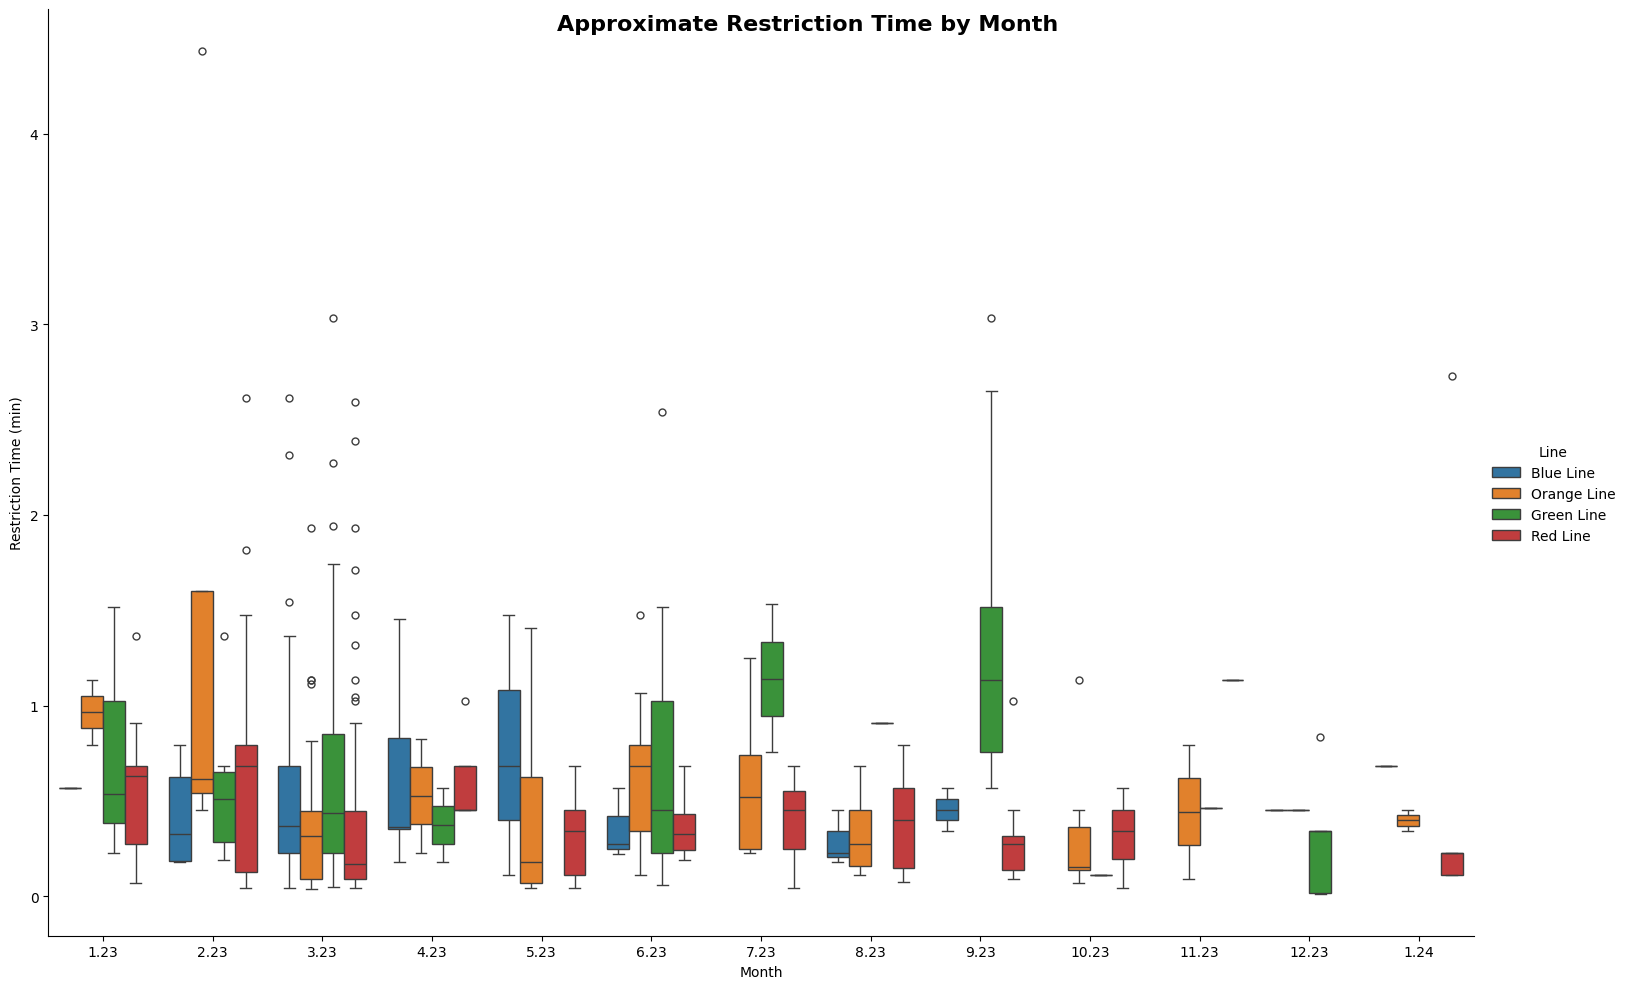

In [ ]:
#Restriction Time in Minutes:

grid=sns.catplot(
    x="Month_Year",
    y="Restriction_Time_(min)",
    data=mbta_dat,
kind="box",
hue='Line',
hue_order=["Blue Line", "Orange Line", "Green Line", "Red Line"],
height=10,
aspect=1.5)

grid.set_axis_labels("Month","Restriction Time (min)")
grid.fig.suptitle('Approximate Restriction Time by Month',
             fontsize=16, fontweight='bold')
plt.show()